# PARTA

In [ ]:
pip install pandas statsmodels

Note: you may need to restart the kernel to use updated packages.


# Q1

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

#Q1 Load the dataset
file_path = 'C:\\Users\\PC\\Desktop\\IT Innovation\\Individual 2\\GermanCredit.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Splitting the dataset into training and validation sets
train_data = data.iloc[:800]
validation_data = data.iloc[800:]

# Logistic regression formula
formula = ('Good ~ C(CreditPurpose) + C(DebtorGuarantor) + C(CheckingAccount) + '
           'C(SavingsAccount) + C(CreditHistory) + C(ExistingCredit) + '
           'C(OtherInstallment) + C(Female) + C(Employment) + C(PropertyOwnership) + '
           'C(Housing) + C(Job) + C(Dependent) + C(Telephone) + C(ForeignWorker) + '
           'CreditDuration + CreditAmount + InstallmentPct + Age + ResidenceYears')

# Building the logistic regression model
logistic_model = smf.logit(formula=formula, data=train_data).fit()

# Displaying the summary of the model
print(logistic_model.summary())


Optimization terminated successfully.
         Current function value: 0.440398
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      751
Method:                           MLE   Df Model:                           48
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                  0.2791
Time:                        22:22:04   Log-Likelihood:                -352.32
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 3.465e-33
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.6012      1.322      3.480      0.001       2.

# Q2

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np


#Q2 Splitting the dataset into training and validation sets
train_data = data.iloc[:800]

# Logistic regression formula
formula = ('Good ~ C(CreditPurpose) + C(DebtorGuarantor) + C(CheckingAccount) + '
           'C(SavingsAccount) + C(CreditHistory) + C(ExistingCredit) + '
           'C(OtherInstallment) + C(Female) + C(Employment) + C(PropertyOwnership) + '
           'C(Housing) + C(Job) + C(Dependent) + C(Telephone) + C(ForeignWorker) + '
           'CreditDuration + CreditAmount + InstallmentPct + Age + ResidenceYears')

# Building the logistic regression model
logistic_model = smf.logit(formula=formula, data=train_data).fit()

# Calculating mean or mode for the specified columns
mean_mode_values = train_data.agg({
    'DebtorGuarantor': lambda x: pd.Series.mode(x)[0], 'CheckingAccount': lambda x: pd.Series.mode(x)[0],
    'SavingsAccount': lambda x: pd.Series.mode(x)[0], 'CreditHistory': lambda x: pd.Series.mode(x)[0],
    'ExistingCredit': lambda x: pd.Series.mode(x)[0], 'OtherInstallment': lambda x: pd.Series.mode(x)[0],
    'Female': lambda x: pd.Series.mode(x)[0], 'Employment': lambda x: pd.Series.mode(x)[0],
    'PropertyOwnership': lambda x: pd.Series.mode(x)[0], 'Housing': lambda x: pd.Series.mode(x)[0],
    'Job': lambda x: pd.Series.mode(x)[0], 'Dependent': lambda x: pd.Series.mode(x)[0],
    'Telephone': lambda x: pd.Series.mode(x)[0], 'ForeignWorker': lambda x: pd.Series.mode(x)[0],
    'CreditDuration': 'mean', 'CreditAmount': 'mean', 'InstallmentPct': 'mean',
    'Age': 'mean', 'ResidenceYears': 'mean'
}).to_dict()

# Setting up predictions for CreditPurpose='1' and '0'
values_for_prediction1 = mean_mode_values.copy()
values_for_prediction1['CreditPurpose'] = 1
values_for_prediction2 = mean_mode_values.copy()
values_for_prediction2['CreditPurpose'] = 0

# Convert dictionaries to dataframes for prediction
predict_df1 = pd.DataFrame(values_for_prediction1, index=[0])
predict_df2 = pd.DataFrame(values_for_prediction2, index=[0])

# Making predictions
prob_pred1 = logistic_model.predict(predict_df1)
prob_pred2 = logistic_model.predict(predict_df2)

# Converting probabilities to log odds
log_odds_pred1 = np.log(prob_pred1 / (1 - prob_pred1))
log_odds_pred2 = np.log(prob_pred2 / (1 - prob_pred2))

# Calculating the difference in log odds
log_odds_diff = log_odds_pred1 - log_odds_pred2

# Output the results
print("Log Odds for CreditPurpose='1':", log_odds_pred1.values[0])
print("Log Odds for CreditPurpose='0':", log_odds_pred2.values[0])
print("Difference in Log Odds:", log_odds_diff.values[0])


Optimization terminated successfully.
         Current function value: 0.440398
         Iterations 7
Log Odds for CreditPurpose='1': 2.803604107746638
Log Odds for CreditPurpose='0': 1.125711739862072
Difference in Log Odds: 1.6778923678845659


# Q3

Optimization terminated successfully.
         Current function value: 0.440398
         Iterations 7


C:\Users\PC\AppData\Local\Temp\ipykernel_6004\2146793702.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['pred_good'] = logistic_model.predict(train_data)
C:\Users\PC\AppData\Local\Temp\ipykernel_6004\2146793702.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['pred_good_dec'] = pd.qcut(train_data['pred_good'], 10, labels=range(10, 0, -1))


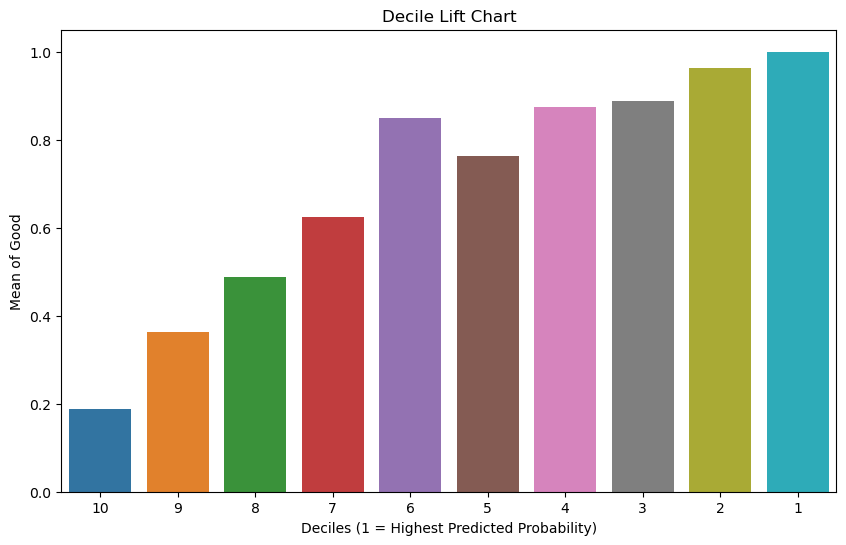

Number of Deciles above 85% probability: 4


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


#Q3 Splitting the dataset into training and validation sets
train_data = data.iloc[:800]

# Logistic regression formula
formula = ('Good ~ C(CreditPurpose) + C(DebtorGuarantor) + C(CheckingAccount) + '
           'C(SavingsAccount) + C(CreditHistory) + C(ExistingCredit) + '
           'C(OtherInstallment) + C(Female) + C(Employment) + C(PropertyOwnership) + '
           'C(Housing) + C(Job) + C(Dependent) + C(Telephone) + C(ForeignWorker) + '
           'CreditDuration + CreditAmount + InstallmentPct + Age + ResidenceYears')

# Building the logistic regression model
logistic_model = smf.logit(formula=formula, data=train_data).fit()

# Predicting the probability of being a good credit risk for the training set
train_data['pred_good'] = logistic_model.predict(train_data)

# Creating 10 deciles in reverse order based on 'pred_good'
train_data['pred_good_dec'] = pd.qcut(train_data['pred_good'], 10, labels=range(10, 0, -1))

# Calculating the mean of 'Good' for each decile
decile_means = train_data.groupby('pred_good_dec')['Good'].mean()

# Creating a decile lift chart
plt.figure(figsize=(10, 6))
sns.barplot(x=decile_means.index, y=decile_means.values)
plt.title('Decile Lift Chart')
plt.xlabel('Deciles (1 = Highest Predicted Probability)')
plt.ylabel('Mean of Good')
plt.show()

# Counting the number of deciles with more than 85% probability of being a good credit risk
deciles_above_85 = sum(decile_means > 0.85)
print("Number of Deciles above 85% probability:", deciles_above_85)


# Q4

In [ ]:
# Split the data into training and validation sets
training_set = data.iloc[:800]
validation_set = data.iloc[800:]


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Predict the probability of being a good credit risk for each observation in the training set
pred_probabilities = logistic_model.predict(training_set)

# Applying the cutoff of 0.8 to create pred_good_point8
pred_good_point8 = (pred_probabilities >= 0.8).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(training_set['Good'], pred_good_point8)

# Calculate sensitivity and specificity
# Sensitivity (True Positive Rate): TP / (TP + FN)
# Specificity (True Negative Rate): TN / (TN + FP)
TP, FN, FP, TN = conf_matrix[1, 1], conf_matrix[1, 0], conf_matrix[0, 1], conf_matrix[0, 0]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

conf_matrix, sensitivity, specificity

(array([[203,  37],
        [213, 347]], dtype=int64),
 0.6196428571428572,
 0.8458333333333333)

# Q5

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix


#Q5 Splitting the dataset into training and validation sets
train_data = data.iloc[:800]

# Logistic regression formula
formula = ('Good ~ C(CreditPurpose) + C(DebtorGuarantor) + C(CheckingAccount) + '
           'C(SavingsAccount) + C(CreditHistory) + C(ExistingCredit) + '
           'C(OtherInstallment) + C(Female) + C(Employment) + C(PropertyOwnership) + '
           'C(Housing) + C(Job) + C(Dependent) + C(Telephone) + C(ForeignWorker) + '
           'CreditDuration + CreditAmount + InstallmentPct + Age + ResidenceYears')

# Building the logistic regression model
logistic_model = smf.logit(formula=formula, data=train_data).fit()

# Predicting the probability of being a good credit risk
train_data['pred_good'] = logistic_model.predict(train_data)

# Recoding 'pred_good' into a dummy variable 'pred_good_point8'
train_data['pred_good_point8'] = (train_data['pred_good'] >= 0.8).astype(int)

# Calculating the number of automatically approved credit applications
total_approved = train_data['pred_good_point8'].sum()

# Of the approved applications, calculating how many are actually good and bad credit risks
approved_good_risks = train_data[train_data['pred_good_point8'] == 1]['Good'].sum()
approved_bad_risks = total_approved - approved_good_risks

# Calculating the percentage of good credit risks among the approved applications
percentage_good_risks = (approved_good_risks / total_approved) * 100

# Outputting the results
print("Total Credit Applications Automatically Approved:", total_approved)
print("Number of Good Credit Risks among Approved Applications:", approved_good_risks)
print("Number of Bad Credit Risks among Approved Applications:", approved_bad_risks)
print("Percentage of Good Credit Risks among Approved Applications:", percentage_good_risks)


Optimization terminated successfully.
         Current function value: 0.440398
         Iterations 7
Total Credit Applications Automatically Approved: 384
Number of Good Credit Risks among Approved Applications: 347
Number of Bad Credit Risks among Approved Applications: 37
Percentage of Good Credit Risks among Approved Applications: 90.36458333333334


C:\Users\PC\AppData\Local\Temp\ipykernel_6004\2716434357.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['pred_good'] = logistic_model.predict(train_data)
C:\Users\PC\AppData\Local\Temp\ipykernel_6004\2716434357.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['pred_good_point8'] = (train_data['pred_good'] >= 0.8).astype(int)


# Q6

In [ ]:
# Predict the probability of being a good credit risk for each observation in the validation set
validation_pred_probabilities = logistic_model.predict(validation_set)

# Applying the cutoff of 0.8 to create pred_good_point8 for the validation set
validation_pred_good_point8 = (validation_pred_probabilities >= 0.8).astype(int)

# Create a confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(validation_set['Good'], validation_pred_good_point8)

# Calculate sensitivity and specificity for the validation set
# Sensitivity (True Positive Rate): TP / (TP + FN)
# Specificity (True Negative Rate): TN / (TN + FP)
validation_TP, validation_FN, validation_FP, validation_TN = validation_conf_matrix[1, 1], validation_conf_matrix[1, 0], validation_conf_matrix[0, 1], validation_conf_matrix[0, 0]
validation_sensitivity = validation_TP / (validation_TP + validation_FN)
validation_specificity = validation_TN / (validation_TN + validation_FP)

validation_conf_matrix, validation_sensitivity, validation_specificity



(array([[51,  9],
        [56, 84]], dtype=int64),
 0.6,
 0.85)

# Q7

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

#Q7 Splitting the dataset into training and validation sets
train_data = data.iloc[:800]
validation_data = data.iloc[800:]

# Logistic regression formula
formula = ('Good ~ C(CreditPurpose) + C(DebtorGuarantor) + C(CheckingAccount) + '
           'C(SavingsAccount) + C(CreditHistory) + C(ExistingCredit) + '
           'C(OtherInstallment) + C(Female) + C(Employment) + C(PropertyOwnership) + '
           'C(Housing) + C(Job) + C(Dependent) + C(Telephone) + C(ForeignWorker) + '
           'CreditDuration + CreditAmount + InstallmentPct + Age + ResidenceYears')

# Building thee logistic regression model
logistic_model = smf.logit(formula=formula, data=train_data).fit()

# Predicting the probability of being a good credit risk for the validation set
validation_data['pred_good'] = logistic_model.predict(validation_data)

# Recoding 'pred_good' into a dummy variable 'pred_good_point8' for the validation set
validation_data['pred_good_point8'] = (validation_data['pred_good'] >= 0.8).astype(int)

# Calculating the number of automatically approved credit applications in the validation set
total_approved_validation = validation_data['pred_good_point8'].sum()

# Calculating the sum of credit amounts that will be automatically approved
sum_approved_amounts = validation_data[validation_data['pred_good_point8'] == 1]['CreditAmount'].sum()

# Using the percentage of automatically approved credit applications that are good credit risks in the training set
percentage_good_risks_training = 90.36458333333334  # As reported in Q5

# Extrapolating this percentage to the validation set to estimate the number of good credit risks
estimated_good_risks_validation = int((percentage_good_risks_training / 100) * total_approved_validation)

# Outputting the results
print("Total Credit Applications Automatically Approved in Validation Set:", total_approved_validation)
print("Sum of Credit Amounts Automatically Approved:", sum_approved_amounts)
print("Estimated Number of Good Credit Risks among Approved Applications:", estimated_good_risks_validation)


Optimization terminated successfully.
         Current function value: 0.440398
         Iterations 7
Total Credit Applications Automatically Approved in Validation Set: 93
Sum of Credit Amounts Automatically Approved: 261801
Estimated Number of Good Credit Risks among Approved Applications: 84


C:\Users\PC\AppData\Local\Temp\ipykernel_6004\845316404.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['pred_good'] = logistic_model.predict(validation_data)
C:\Users\PC\AppData\Local\Temp\ipykernel_6004\845316404.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['pred_good_point8'] = (validation_data['pred_good'] >= 0.8).astype(int)


# PARTB

# Q1

In [ ]:
import pandas as pd

#Q1 Load the dataset
file_path = 'C:\\Users\\PC\\Desktop\\IT Innovation\\Individual 2\\CuteOutfitMarketing.csv'
data = pd.read_csv(file_path)
# Replace 'NA' and NaN with 'Unknown' in the 'History' column
data['History'].fillna('Unknown', inplace=True)

# Constants
average_sales_per_purchase = 40.00  # Average dollar sales per purchase in dollars
gross_profit_margin = 0.60  # Gross profit margin (60%)
cost_per_catalog = 2.00  # Cost to print and mail each catalog in dollars
total_customers = 500000  # Total number of customers

# Estimating the response rate from the sample data
response_rate = data['Purchase'].mean()

# Estimating the expected number of purchases
expected_purchases = total_customers * response_rate

# Calculating Gross Profit
gross_profit_per_purchase = average_sales_per_purchase * gross_profit_margin
total_gross_profit = expected_purchases * gross_profit_per_purchase

# Calculating Printing and Mailing Costs
total_printing_mailing_cost = total_customers * cost_per_catalog

# Calculating Net Profit
net_profit = total_gross_profit - total_printing_mailing_cost

# Calculating ROI (Return on Investment)
roi = net_profit / total_printing_mailing_cost

# Outputting the results
print(f"Expected Number of Purchases: {expected_purchases}")
print(f"Total Gross Profit: ${total_gross_profit:,.2f}")
print(f"Total Printing and Mailing Cost: ${total_printing_mailing_cost:,.2f}")
print(f"Net Profit: ${net_profit:,.2f}")
print(f"ROI (Return on Investment): {roi * 100:.2f}%")



Expected Number of Purchases: 46000.0
Total Gross Profit: $1,104,000.00
Total Printing and Mailing Cost: $1,000,000.00
Net Profit: $104,000.00
ROI (Return on Investment): 10.40%


# Q2

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your dataset
dataset = pd.read_csv('C:\\Users\\PC\\Desktop\\IT Innovation\\Individual 2\\CuteOutfitMarketing.csv')

# Replace 'NA' and NaN with 'Unknown' in the 'History' column
dataset['History'].fillna('Unknown', inplace=True)

# Define the logistic regression model formula
formula = 'Purchase ~ C(Age) + C(Gender) + C(OwnHome) + C(Married) + C(Location) + Children + C(History) + Income'

# Build the logistic regression model
model = smf.logit(formula, data=dataset).fit()

# Print the summary of the model
print(model.summary2())

         Current function value: 0.177717
         Iterations: 35
                                 Results: Logit
Model:                    Logit                 Method:                MLE       
Dependent Variable:       Purchase              Pseudo R-squared:      0.421     
Date:                     2023-12-10 22:22      AIC:                   379.4339  
No. Observations:         1000                  BIC:                   438.3270  
Df Model:                 11                    Log-Likelihood:        -177.72   
Df Residuals:             988                   LL-Null:               -307.14   
Converged:                0.0000                LLR p-value:           3.9119e-49
No. Iterations:           35.0000               Scale:                 1.0000    
---------------------------------------------------------------------------------
                       Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Q3

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf


# Replace 'NA' and NaN with 'Unknown' in the 'History' column
dataset['History'].fillna('Unknown', inplace=True)

# Define the logistic regression model formula
formula = 'Purchase ~ C(Age) + C(Gender) + C(OwnHome) + C(Married) + C(Location) + Children + C(History) + Income'

# Build the logistic regression model
model = smf.logit(formula, data=dataset).fit()

# Calculate predicted probabilities
dataset['PredictedProb'] = model.predict(dataset)

# Create reverse deciles based on the predicted probabilities
dataset['Decile'] = pd.qcut(dataset['PredictedProb'], 10, labels=False)

# Calculate total responses and response rate for each decile
decile_analysis = dataset.groupby('Decile').agg(
    TotalResponses=pd.NamedAgg(column='Purchase', aggfunc='sum'),
    TotalObservations=pd.NamedAgg(column='Purchase', aggfunc='count')
)
decile_analysis['ResponseRate'] = decile_analysis['TotalResponses'] / decile_analysis['TotalObservations'] * 100

# Print the decile analysis
print(decile_analysis)


         Current function value: 0.177717
         Iterations: 35
        TotalResponses  TotalObservations  ResponseRate
Decile                                                 
0                    0                100           0.0
1                    0                100           0.0
2                    0                100           0.0
3                    0                100           0.0
4                    0                100           0.0
5                    0                100           0.0
6                    5                100           5.0
7                   15                100          15.0
8                   19                100          19.0
9                   53                100          53.0


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Q4

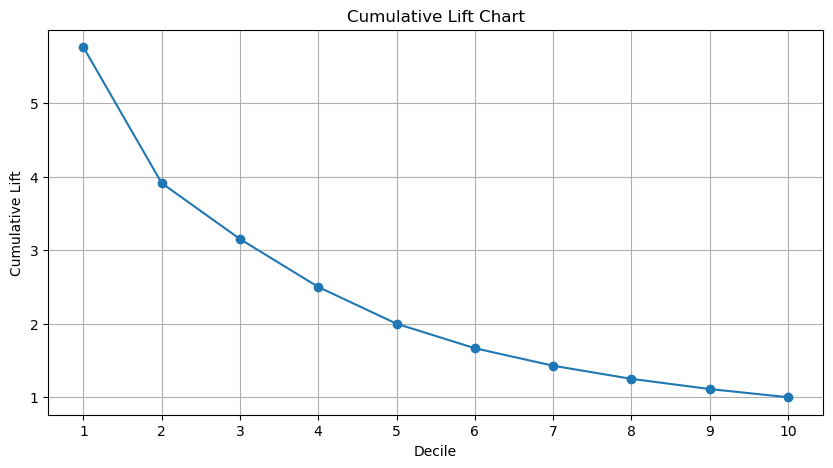

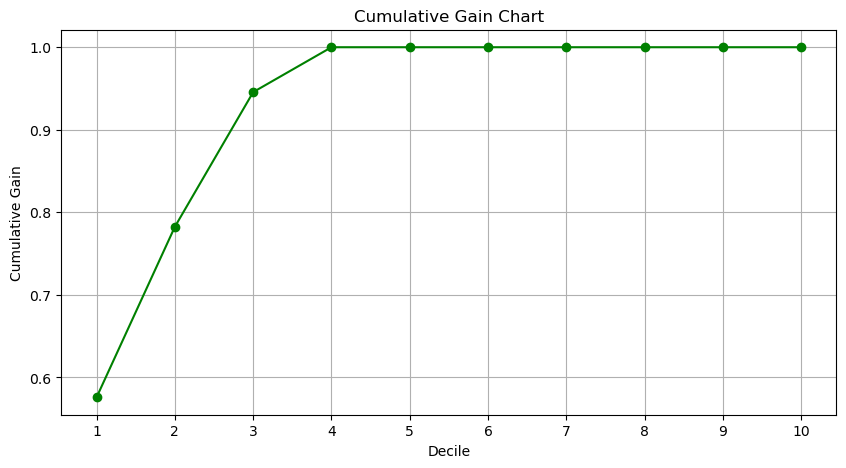

In [ ]:
# Python code for generating the cumulative lift chart and cumulative gain chart

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming data is already loaded and the logistic regression model is fitted
# and 'data' DataFrame contains the necessary columns

# Calculate the ratio of positives in Purchase
ratio_positives = dataset['Purchase'].mean()

# Initialize lists to store cumulative lift and gain values
cumulative_lift = []
cumulative_gain = []

# Total actual positive responses
total_positive_responses = dataset['Purchase'].sum()

# Loop from the top decile to the bottom
for decile in sorted(dataset['Decile'].unique(), reverse=True):
    # Data up to the current decile
    data_up_to_decile = dataset[dataset['Decile'] >= decile]

    # Cumulative positive responses up to this decile
    cumulative_positive_responses = data_up_to_decile['Purchase'].sum()

    # Cumulative number of samples up to this decile
    cumulative_samples = data_up_to_decile.shape[0]

    # Cumulative Lift calculation
    lift = (cumulative_positive_responses / cumulative_samples) / ratio_positives
    cumulative_lift.append(lift)

    # Cumulative Gain calculation
    gain = cumulative_positive_responses / total_positive_responses
    cumulative_gain.append(gain)

# Create cumulative lift chart
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cumulative_lift, marker='o')
plt.title('Cumulative Lift Chart')
plt.xlabel('Decile')
plt.ylabel('Cumulative Lift')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# Create cumulative gain chart
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cumulative_gain, marker='o', color='green')
plt.title('Cumulative Gain Chart')
plt.xlabel('Decile')
plt.ylabel('Cumulative Gain')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# Q5

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Replace 'NA' and NaN with 'Unknown' in the 'History' column
dataset['History'].fillna('Unknown', inplace=True)

# Define the logistic regression model formula
formula = 'Purchase ~ C(Age) + C(Gender) + C(OwnHome) + C(Married) + C(Location) + Children + C(History) + Income'

# Build the logistic regression model
model = smf.logit(formula, data=dataset).fit()

# Calculate predicted probabilities
dataset['predicted_prob'] = model.predict(dataset)

# Constants for cost and profit calculations
cost_per_mail = 2.00  # Cost to print and mail the product catalog to each customer
average_sales_per_purchase = 40.00  # Average dollar sales per purchase
gross_profit_margin = 0.60  # Gross profit margin

# Calculating the breakeven response rate
breakeven_response_rate = cost_per_mail / (average_sales_per_purchase * gross_profit_margin)

# Create a new variable 'Mail1' based on the breakeven response rate
dataset['Mail1'] = dataset['predicted_prob'].apply(lambda x: 1 if x >= breakeven_response_rate else 0)

# Estimating the gross profit and net profit for targeted marketing
sample_responses = dataset[dataset['Mail1'] == 1]['Purchase'].sum()
sample_mailing_cost = dataset['Mail1'].sum() * cost_per_mail

# Scale up to the entire customer base of 500,000 customers
scaled_responses = (sample_responses / len(dataset)) * 500000  # Total number of customers is 500,000
total_mailing_cost = (dataset['Mail1'].sum() / len(dataset)) * 500000 * cost_per_mail

# Calculate gross and net profits
total_gross_profit = scaled_responses * average_sales_per_purchase * gross_profit_margin
net_profit = total_gross_profit - total_mailing_cost

# Calculate ROI
roi = net_profit / total_mailing_cost if total_mailing_cost else 0

# Print the results
print(f"Breakeven Response Rate: {breakeven_response_rate}")
print(f"Total Gross Profit: ${total_gross_profit}")
print(f"Net Profit: ${net_profit}")
print(f"ROI: {roi}")

# Replace '/path/to/your/CuteOutfitMarketing.csv' with the actual path to your dataset file.
# Run this code in your local Python environment to perform the analysis.


         Current function value: 0.177717
         Iterations: 35
Breakeven Response Rate: 0.08333333333333333
Total Gross Profit: $1020000.0
Net Profit: $727000.0
ROI: 2.4812286689419794


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Q6

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace 'NA' and NaN with 'Unknown' in the 'History' column
dataset['History'].fillna('Unknown', inplace=True)

#Q6 Selecting features and target variable
features = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Children', 'History', 'Income']
X = data[features]
y = data['Purchase']

# One-hot encoding for categorical variables
categorical_features = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History']
one_hot_encoder = OneHotEncoder()

# Building the Gradient Boosting Classifier model
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=4, random_state=1)

# Creating a pipeline with one-hot encoding and the classifier
pipeline = Pipeline([
    ('one_hot', ColumnTransformer([('one_hot', one_hot_encoder, categorical_features)], remainder='passthrough')),
    ('clf', clf)
])

# Fitting the model
pipeline.fit(X, y)

# Predicting the probabilities of purchase for each customer
data['gbt_prob_purchase'] = pipeline.predict_proba(X)[:, 1]

# Creating deciles based on the predicted probabilities
data['gbt_decile'] = pd.qcut(data['gbt_prob_purchase'], 10, labels=False)

# Calculating the total number of responses and the response rate for each decile
gbt_decile_analysis = data.groupby('gbt_decile').agg(
    total_responses=('Purchase', 'sum'),
    total_customers=('Purchase', 'count'),
    response_rate=('Purchase', 'mean')
).reset_index()

# Renaming the decile to be more intuitive (1 for highest probability, 10 for lowest)
gbt_decile_analysis['gbt_decile'] = 10 - gbt_decile_analysis['gbt_decile']

# Sorting by decile
gbt_decile_analysis = gbt_decile_analysis.sort_values('gbt_decile', ascending=False)
gbt_decile_analysis.reset_index(drop=True, inplace=True)

gbt_decile_analysis


,gbt_decile,total_responses,total_customers,response_rate
0,10,0,101,0.00
1,9,0,99,0.00
2,8,0,118,0.00
3,7,0,83,0.00
4,6,0,104,0.00
5,5,0,95,0.00
6,4,0,100,0.00
7,3,0,100,0.00
8,2,2,100,0.02
9,1,90,100,0.90


# Q7

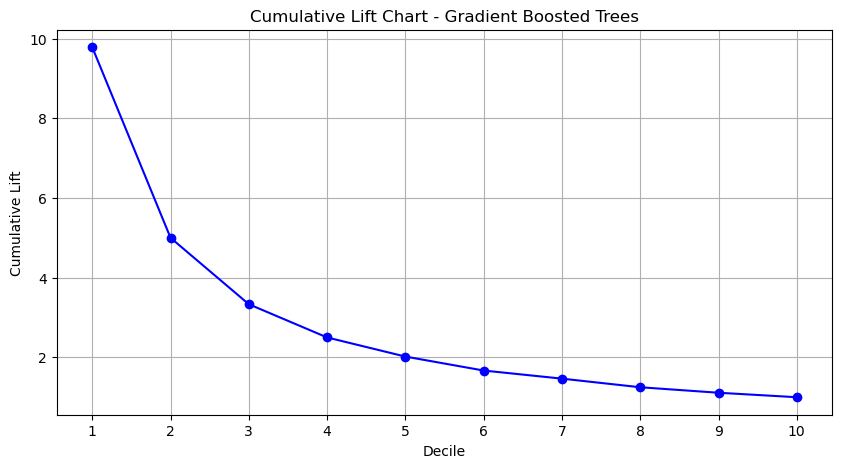

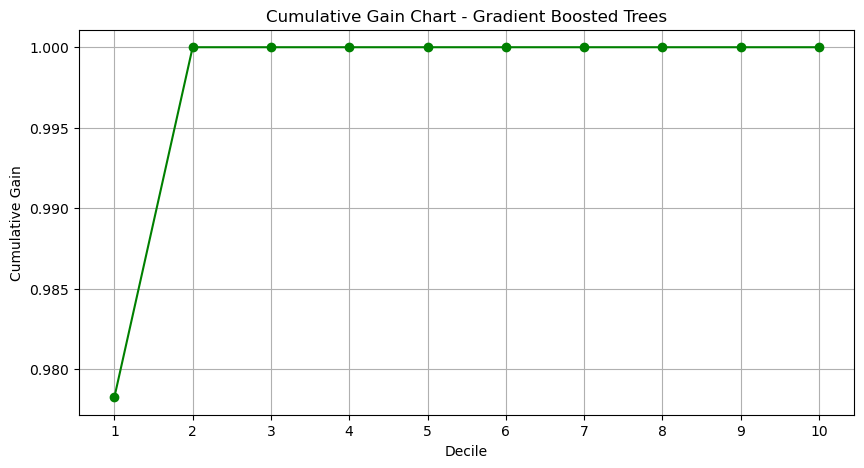

In [ ]:
# Re-calculating cumulative lift and gain, this time only for the Gradient Boosted Trees model

# Reinitialize lists for cumulative lift and gain
cumulative_lift_gbt_only = []
cumulative_gain_gbt_only = []

# Loop from the top decile to the bottom for the gradient boosted trees model
for decile in sorted(data['gbt_decile'].unique(), reverse=True):
    # Data up to the current decile
    data_up_to_decile_gbt = data[data['gbt_decile'] >= decile]

    # Cumulative positive responses up to this decile
    cumulative_positive_responses_gbt = data_up_to_decile_gbt['Purchase'].sum()

    # Cumulative number of samples up to this decile
    cumulative_samples_gbt = data_up_to_decile_gbt.shape[0]

    # Cumulative Lift calculation
    lift_gbt = (cumulative_positive_responses_gbt / cumulative_samples_gbt) / ratio_positives
    cumulative_lift_gbt_only.append(lift_gbt)

    # Cumulative Gain calculation
    gain_gbt = cumulative_positive_responses_gbt / total_positive_responses
    cumulative_gain_gbt_only.append(gain_gbt)

# Create cumulative lift chart for the gradient boosted trees model
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cumulative_lift_gbt_only, marker='o', color='blue')
plt.title('Cumulative Lift Chart - Gradient Boosted Trees')
plt.xlabel('Decile')
plt.ylabel('Cumulative Lift')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# Create cumulative gain chart for the gradient boosted trees model
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cumulative_gain_gbt_only, marker='o', color='green')
plt.title('Cumulative Gain Chart - Gradient Boosted Trees')
plt.xlabel('Decile')
plt.ylabel('Cumulative Gain')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# Q8

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace 'NA' and NaN with 'Unknown' in the 'History' column
dataset['History'].fillna('Unknown', inplace=True)

#Q8 Constants
average_sales_per_purchase = 40.00  # Average dollar sales per purchase in dollars
gross_profit_margin = 0.60  # Gross profit margin (60%)
cost_per_catalog = 2.00  # Cost to print and mail each catalog in dollars

# Preparing data for the GBT model
features = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Children', 'History', 'Income']
X = data[features]
y = data['Purchase']

# One-hot encoding for categorical variables
categorical_features = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History']
one_hot_encoder = OneHotEncoder()

# Building the Gradient Boosting Classifier model
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=4, random_state=1)

# Creating a pipeline with one-hot encoding and the classifier
pipeline = Pipeline([
    ('one_hot', ColumnTransformer([('one_hot', one_hot_encoder, categorical_features)], remainder='passthrough')),
    ('clf', clf)
])

# Fitting the model
pipeline.fit(X, y)

# Predicting the probabilities of purchase for each customer
data['gbt_prob_purchase'] = pipeline.predict_proba(X)[:, 1]

# Breakeven response rate (previously calculated)
breakeven_response_rate = cost_per_catalog / (average_sales_per_purchase * gross_profit_margin)

# Creating the "Mail2" variable
data['Mail2'] = (data['gbt_prob_purchase'] >= breakeven_response_rate).astype(int)

# Estimating financial metrics under targeted marketing strategy using "Mail2"
total_mailed_customers_gbt = data['Mail2'].sum()
estimated_responses_gbt = data[data['Mail2'] == 1]['Purchase'].sum()
total_gross_profit_targeted_gbt = estimated_responses_gbt * average_sales_per_purchase * gross_profit_margin
total_cost_targeted_gbt = total_mailed_customers_gbt * cost_per_catalog
net_profit_targeted_gbt = total_gross_profit_targeted_gbt - total_cost_targeted_gbt
roi_targeted_gbt = net_profit_targeted_gbt / total_cost_targeted_gbt

# Outputting the results
print(f"Total Customers Mailed: {total_mailed_customers_gbt}")
print(f"Estimated Gross Profit: ${total_gross_profit_targeted_gbt}")
print(f"Total Cost: ${total_cost_targeted_gbt}")
print(f"Net Profit: ${net_profit_targeted_gbt}")
print(f"ROI: {roi_targeted_gbt:.2f} or {roi_targeted_gbt * 100:.2f}%")


Total Customers Mailed: 189
Estimated Gross Profit: $2208.0
Total Cost: $378.0
Net Profit: $1830.0
ROI: 4.84 or 484.13%
